In [1]:
!pip install diffusers==0.20.2 transformers==4.33.0 accelerate==0.22.0 xformers==0.0.20
from diffusers import StableDiffusionXLPipeline, EulerAncestralDiscreteScheduler
import torch

!wget https://huggingface.co/Andyrasika/lora_collection/resolve/main/xl_more_art-full_v1.safetensors -O /content/xl_more_art-full_v1.safetensors
pipe = StableDiffusionXLPipeline.from_pretrained('stabilityai/stable-diffusion-xl-base-1.0', safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

pipe.load_lora_weights('/content/xl_more_art-full_v1.safetensors', lora_scale=0.6)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.20.2-py3-none-any.whl size=1342633 sha256=1323ee88fa18baf217b8cfd8e60dc214c70717f7f58188f9151df1fdf7116cfd
  Stored in directory: /root/.cache/pip/wheels/dc/8b/d9/34f7a1936109e05e9bba0cc2241a6f8cd89e25959dc7aae942
Successfully built diffusers
--2023-0

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

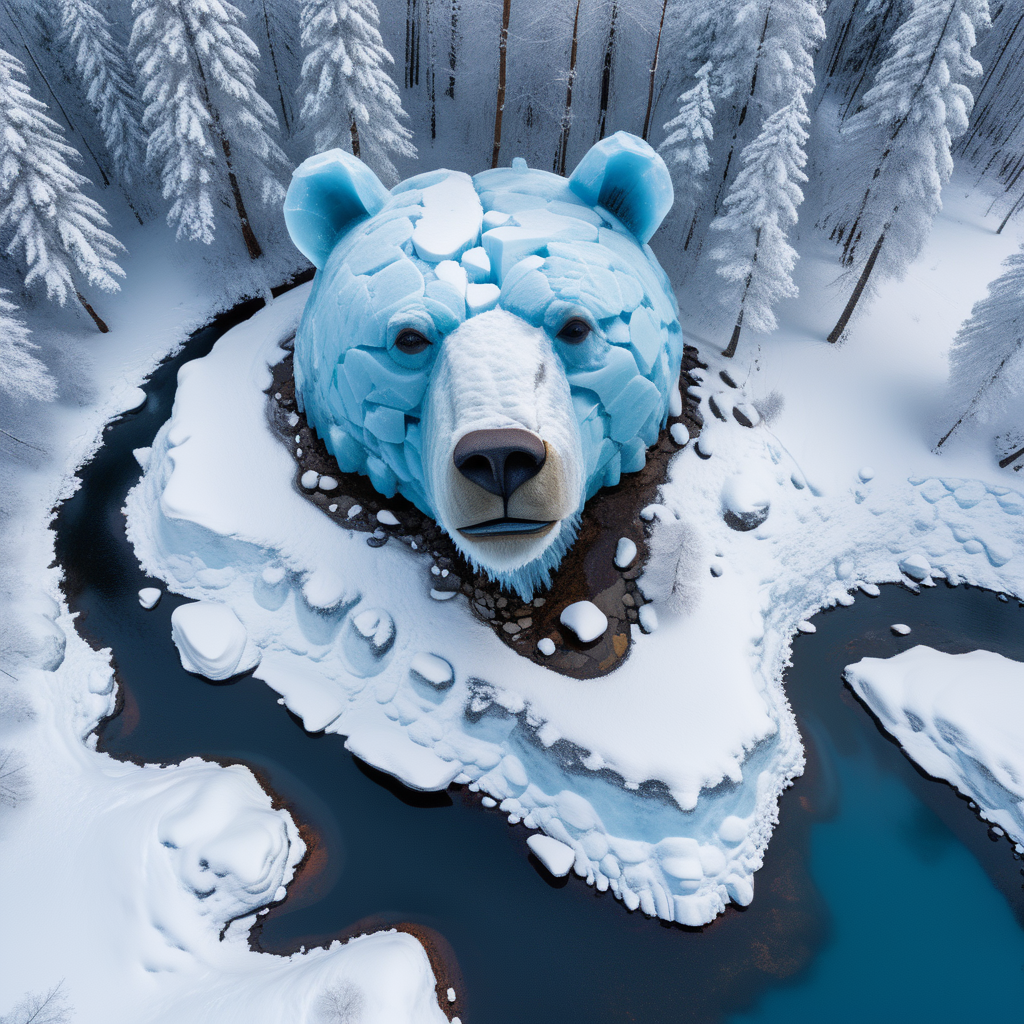

In [2]:
prompt="Aerial,  forest, big rocks, water, river, snow,  road, water,big stylized  shape of a light blue bear head made of ice and rocks, land art"

negative_prompt = "tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft,  text, logo, jewel, armor, plastic,3D, hair, fur, beach, sand"

image = pipe(prompt, negative_prompt=negative_prompt).images[0]
image